# Ch12. Training Artificial Neural Networks for Image Recognition

<strong>딥사이어인 정지원</strong>

 딥러닝은 큰 호평을 받아가고 있으며 머신러닝 분야에서 가장 핫한 분야이다. 딥러닝은 많은 layer들을 가장 효율적으로 학습 시키기 위해 개발된 알고리듬들의 집합으로 이해될 수 있다. 이번 장에서는 인공신경망의 기본적인 개념에 대해 익히며, 당신은 머신러닝 연구를 더욱 흥미롭게 할 수 있을 것이다. 또한 현재 계속 개발되고 있는 파이썬 기반의 딥러닝 라이브러리도 활용할 수 있을 것이다.

 다음과 같은 주제에 대해 다룬다.

• Getting a conceptual understanding of multi-layer neural networks

• Training neural networks for image classification

• Implementing the powerful backpropagation algorithm

• Debugging neural network implementations

## Modeling complex functions with artificial neural networks

 단원에 들어가기 앞서, 2단원 '분류를 위한 기계학습 알고리듬'에서 배운 인공신경 알고리듬을 본다. 인공신경은 다중레이어 인공신경망의 구성요소를 표현한다. 인간이 복잡한 문제를 풀어갈 때의 인간의 뇌가 작동하는 원리를 모방하여 만들어졌다. 최근 몇년 사이에 인기를 얻었지만, 실제로 1940년도부터 연구가 돼었었다. 

지난 10년간, 딥러닝 알고리듬에 대한 많은 주요한 성과가 있었다. 다중 레이어로 구성된 Deep 신경망을 pre-train하기 위해 Unlabeld data에 대한 featrue detectors를 할 수 있게 됐다. 실제 신경망은 academic research 뿐만이 아니라, 페이스북, 마이크로소프트, 구글 등과 같은 Technology Company에서도 인기있는 주제다. 

딥 뉴럴 네트워크에 대한 다양한 흥미로운 application이 있다. 페이스북의 DeepFace(자동 tagging), Baidu의 DeepSpeech(handle voice queries in Mandarin)등이 있다. 또한 제약산업에서 최근 딥러닝 기술을 이용하여 의약품 발견과 유독성 예측을 하고 있다. 이러한 연구는 새로운 기술(딥러닝)이 전통 방식을 통한 가상 탐색(Virtual Screening)의 성과를 상당히 뛰어넘었다는 것을 보여준다.

## Single-layer neural network recap

이번 장에서는 멀티 레이어 뉴럴 네트워크에 대해서 배운다. 어떻게 train 시키고, 복잡한 문제를 해결하는지에 대해서 배운다. 하지만 깊이 들어가기 전에, 먼저 싱글 레이어 뉴럴 네트워크에 대해 살펴본다. 이미 Chp2에서 소개된 ADAptive LInear NEruon에 대해 소개한다.

![Image](Pictures/chp12/1.png)

Chp2. Training Machine Learning Algorithms for Classifiation에서, 우리는 Adaline algorithm이 binary classification을 수행하는 원리에 대해 배웠다. 경사하강법을 이용한 최적화 알고리듬으로, 모델의 weight 계수를 학습시킬 수 있었다. 매 epoch 마다, 우리는 새로운 weight 벡터 w를 다음과 같은 룰로 update 했다.

![Image](Pictures/chp12/2.PNG)

 다시 말하면, 우리는 전체 트레이닝 셋을 기반으로 한 경사를 계산하고, gradient ∇J(w)의 반대방향으로 한 단계씩 진행해가며 모델의 weight를 업데이트 했다. 모델의 최적 weight를 구하기 위해, 우리는 목적함수를 cost function의 SSE로 정의하여 최적화를 한다. 또한, 학습률 에타를 gradient에 곱하여, 학습률이 높아지게 한다. 우리는 학습의 속도와 글로벌 미니멈에서 크게 벗어나는 overshooting 사이에서 적당한 밸런스를 맞춰 에타를 정해줘야 한다.

 경사하강 최적화에서, 우리는 모든 weight를 각 epoch이 끝날 때, 동시에 업데이트 해줬다. 그리고 각 weight w_j에 대한 편미분값들을 모은 w라는 weight vector을 다음과 같이 정의한다.

![Image](Pictures/chp12/3.PNG)

y^(i)는 특정 샘플 x^(i)의 레이블이며, a^(i)는 뉴런의 엑티베이션이다. ADAline는 특별히 Linear한 function을 가지며, ∮(z)는 다음과 같이 정의한다.

![Image](Pictures/chp12/4.PNG)

 여기서, z는 다음과 같이 인풋과 weight의 리니어 컴비네이션으로 계산된다.

![Image](Pictures/chp12/5.PNG)

엑티베이션 ∮(z)를 경사 업데이트를 계산하기 위해 쓰이지만, contiunous한 output을 binary 형태로 변환하기 위하여 threshold function을 사용한다.

![Image](Pictures/chp12/6.PNG)

## Introducing the multi-layer neural network architecture

  이 섹션에서는, 어떻게 여러개의 싱글 뉴런들을 멀티레이어 feedforward 뉴럴 네트워크로 연결시키는지에 대해 보게 된다. 이 특별한 타입의 네트워크는 Multi-layer perceptron(MLP)라 불린다. 다음 사진은 MLP의 개념을 보여준다. 하나의 input layer와 하나의 hidden layer, 하나의 output layer로 구성돼있다. 히든 레이어 안의 unit들은 인풋레이어와 아웃풋 레이어와 연결되며, 모든 아웃풋레이어는 모든 히든레이어와 연결된다. 만약 네트워크가 하나 이상의 히든레이어를 갖는 경우, 이것을 deep 인공신경망이라 부른다.

![Image](Pictures/chp12/7.png)

깊은 네트워크 구조를 만들기 위해 우리 맘대로 MLP에서 히든레이어의 갯수를 정해줄 수 있다. 실제로 우리는 신경망에서 레이어와 units의 개수를 추가적인 하이퍼파라미터로 볼 수 있으며, 이것은 우리가 주어진 문제를 해결하기 위해 cross-validation을 이용하여 최적화하려는 수치이다.(Chp6에서 다뤘다.)

그러나, 우리가 Backpropagation을 이용하여 계산한 error gradients는 네트워크에 layer가 추가 될 수록 점점 작아진다. 기울기가 0에 다가가는 vanishing gradient 문제는 해결하기 어려워진다. 그러므로 이러한 딥 뉴럴 네트워크 구조를 선수학습 시키기 위한 특별한 알고리듬이 개발되고 있으며, 이것이 deep learning이다.

-------------------------------------------------------------------------------------

아래 그림과 같이, l번째 레이어의 i번째 activation unit을 a_i ^(l)로 나타낸다. 또한, activation units a_0^(1)과 a_0^(2)는 각각 bias unit이며, 1과 같게 set해준다. Input Layer에 있는 unit의 activation은 단순히 (input + bias unit)이다.

![Image](Pictures/chp12/8.PNG)

_l_ layer의 각 유닛들은 weight 계수를 통해 _l_+1 레이어의 모든 유닛들과 연결된다. 예를 들어, _l_ 레이어의 _k_번째 유닛은 _l_+1 레이어의 _j_번째 유닛과 연결되며, 이는 w_j,k^(j)로 표현한다. _i_는 샘플 _i_번째를 의미하는 것이지 _i_번째 레이어를 의미하지 않음을 주의해야 한다. 이어지는 절에서, 우리는 종종 명확히 하기 위해 superscript _i_를 생략할 것이다.

아웃풋레이어의 한 유닛이 classification을 할 때는 충분하지만, 우리는 더 많은 뉴럴 네트워크의 일반적인 형태에 대해 보았다. One-vs-All technique을 이용하여 Multi-class classification이 가능하다. 이 과정을 더 잘 이해하기 위해, Chp4, _Building Good Training Sets - Data Preprocessing_ 에서 소개한 범주형 변수를 표현하는 one-hot 표현방법에 대해 떠올려봐라. 예를 들어, 우리는 친숙한 Iris dataset을 통해, 3가지 class labels을 볼 수 있다.

![Image](Pictures/chp12/9.PNG)

뉴럴 네트워크 표현이 처음이라면, 인덱스들의 전문용어들이 혼란스러울 것이다. 왜 w_k,j^(l)가 아니라 w_j,k^(l)로 쓰는지 궁금할 것이다. 처음에는 다소 변덕스러워 보이겠지만, 나중에 뉴럴 네트워크 표현을 벡터화 할 때 더 이해가 쉬워질 것이다. 예를 들어 우리가 인풋과 히든 레이어의 weight matrix를 요약하는데, ~. 이러한 표기법을 내면화 하는 것은 중요하므로, 다음 3-4-3 멀티레이어 퍼셉트론에 대한 설명에 대해 얘기하고 넘어가자.

![Image](Pictures/chp12/10.png)

## Activating a neural network via forward propagation

이번 섹션에서는, MLP model의 output을 구하기 위해 forward propagation의 process에 대해 배운다. 이것이 어떻게 MLP 모델이 학습하는 맥락에 적합한지 알아보기 위해, MLP 학습 과정을 간단한 3가지 단계로 요약했다.

1.
Starting at the input layer, we forward propagate the patterns of the training data through the network to generate an output.

2.
Based on the network's output, we calculate the error that we want to minimize using a cost function that we will describe later.

3.
We backpropagate the error, find its derivative with respect to each weight in the network, and update the model.

마침내 여러번의 epoch을 거치면서 MLP의 학습된 weight가 학습 된 후, 우리는 forward propagation을 이용하여 네트워크 아웃풋을 구하고, threshold function을 통해 예측된 class label을 구할 수 있다.

이제, 어떻게 training data의 패턴으로부터 output을 생산해내는지 각각의 단계를 살펴보자. 히든 유닛의 각각의 유닛은 input layer의 모든 unit과 연결되어있다. 우선, activation인 a_1^(2)는 다음과 같이 구한다.

![Image](Pictures/chp12/11.PNG)

여기서, z_1^(2)는 net input이며, ∮는 activation function이다. 이것은 기울기 기반 접근을 이용하는 weight를 학습하기 위해 미분가능해야 한다. 이미지 분류와 같은 복잡한 문제를 해결하기 위해서는, nonlinear activation function이 필요하다. 예를 들어, sigmoid activation function이 필요한데, chp3에서 Logistic regression을 다룰 때 언급했었다.

 ![Image](Pictures/chp12/12.PNG)

알다시피, sigmoid function은 S 모양 커브 함수이며, z는 0과 1사이의 값이다.0.5를 지나며 그려진다.

![Image](Pictures/chp12/13.png)

MLP는 전형적인 _feedforward_ 인공신경망이다. _feedforward_는 루프 없이 각각의 레이어들이 다음 레이어의 인풋이 되는 형태를 의미한다. 이와 반대로는 _recurrent_ 뉴럴 네트워크가 있으며, 다음 장에서 배우게 된다. 이 네트워크 구조에 있는 인공신경은 전형적으로 _perceptrons_이 아닌 sigmoid unit이기 때문에, 멀티레이어 퍼셉트론이라는 용어는 다소 혼동스럽기도하다. 직관적으로, 우리는 MLP의 신경을 0~1 사이의 반환 값을 갖는 logistic regression units으로 생각할 것이다.

코드의 효율성과 가독성을 위해, 이제부터 activation을 더욱 간단한 형태로 표현하기 위해, 기본적인 선형 대수의 개념을 사용할 것이고, 이것은 NumPy를 이용하여 우리 코드를 벡터화 할 수 있음을 의미한다. for loop를 이용하지 않아도 된다.

![Image](Pictures/chp12/14.PNG)

여기, a^(1)는 [[ 샘플 x^(i)+bias unit ]] 의 [m+1]x1 차원의 feature vector이다. _W_^(1)는 h x[m+1] 차원의 weight matrix이며, h는 신경망의 히든 유닛 수를 의미한다. 행렬 벡터 곱셈이 끝나면, 우리는 h x 1 차원의 net input vector z^(2)를 얻어, a^(2)를 계산할 수 있게 된다. 뿐만 아니라, 트레이닝 셋의 모든 n개의 샘플을 계산하는 것을 일반화 할 수 있다.

![Image](Pictures/chp12/15.PNG)

여기 _A_^(1)은 이제 n x [m+1] 행렬이며, 행렬과 행렬의 곱으로 h x n 차원의 net input matrix인 Z^(2)가 구해진다. 마침내, 우리는 엑티베이션 함수인 ∮(-)을 통해, net input matrix에 있는 각각의 value를 이용하여 h x n 엑티베이션 행렬 A^(2)를 구하게 된다. 이것은 next layer(여기서는 output layer)가 된다.

![Image](Pictures/chp12/16.PNG)

비슷하게, 아까와 같이 output 레이어의 엑티베이션을 다음과 같이 벡터화된 형식으로 나타낼 수 있다.

![Image](Pictures/chp12/17.PNG)

여기서, t x h 행렬 W^(2) 와 h x n 차원의 행렬 A^(2)를 곱하여, t x n 차원의 행렬 Z^(3)을 구할 수 있었다. 이 행렬의 열은 각 샘플의 output을 의미한다.

마침내, sigmoid 엑티베이션 함수를 적용하여 연속형 값을 갖는 네트워크의 결과를 얻었다.

![Image](Pictures/chp12/18.PNG)

## Classifying handwritten digits

앞선 섹션에서 신경망에 관한 많은 이론을 다뤘다. 이번 topic을 처음 접한다면 다소 까다롭게 느껴질 수도 있다. MLP의 weight가 학습되는 알고리듬에 대한 논의를 이어가기 전에, 이론을 벗어나 신경망이 실제로 어떻게 사용되는지 가볍게 살펴보자.

이 섹션에서, 우선 MNIST dataset에서 받아온 손으로 쓰여진 숫자들을 분류하기 위하여 멀티 레이어 신경망을 학습시킬 것이다. 이것은 머신러닝 알고리듬을 위한 기준 데이터 역할을 할 것이다.

## Obtaining the MNIST dataset

![Image](Pictures/chp12/19.PNG)

In [31]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte'% kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
    return images, labels

load_mnist 함수는 두개의 배열을 리턴하는데, 하나는 n * m NumPy 배열(이미지)이며, n은 샘플의 개수, m은 feature의 개수를 의미한다. 각각 6만개의 트레이닝 digits과, 1만개의 test digit이 존재한다. 데이터들은 28 * 28 픽셀을 가지고 있으며, 각각의 픽셀은 gray scale의 밀도값을 나타낸다. 여기서 28 * 28 픽셀을 1차원 열 벡터로 unroll 할 것이며, 이것은 이미지 배열의 열을 의미한다.(이미지당 784개의 row) 두 번째 배열(label)은 0-9까지의 레이블을 가지고 있다.(정답)

![Image](Pictures/chp12/20.PNG)

![Image](Pictures/chp12/21.PNG)

In [32]:
X_train, y_train = load_mnist('C:/Users/Administrator/mnist/', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))
X_test, y_test = load_mnist('C:/Users/Administrator/mnist/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


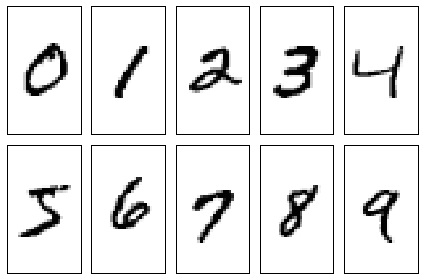

In [33]:
import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

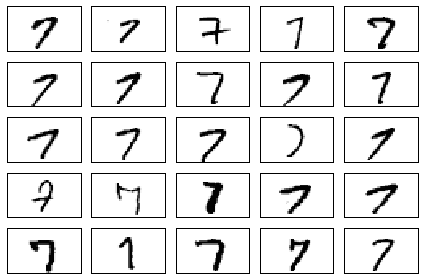

In [36]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

원한다면, MNIST 이미지 데이터와 레이블을 Byte format을 지원하지 않는 프로그램으로 열기 위해 CSV 파일로 저장할 수 있다. 그러나 CSV형식은 더 많은 로컬 드라이브 공간을 필요로 한다는 것을 고려해라.

    • train_img.csv: 109.5 MB
    • train_labels.csv: 120 KB
    • test_img.csv: 18.3 MB
    • test_labels: 20 KB

만약 CSV파일로 저장하려면, 다음과 같은 코드를 작성

In [8]:
np.savetxt('train_img.csv', X_train, fmt='%i' , delimiter=',')
np.savetxt('train_labels.csv', y_train, fmt='%i' , delimiter=',')
np.savetxt('test_img.csv', X_test, fmt='%i' , delimiter=',')
np.savetxt('test_labels.csv', y_test, fmt='%i' , delimiter=',')

CSV파일로 저장하면, NumPy의 genfromtxt 함수를 이용해 다시 불러올 수 있다.

In [9]:
X_train = np.genfromtxt('train_img.csv',dtype=int, delimiter=',')
y_train = np.genfromtxt('train_labels.csv',dtype=int, delimiter=',')
X_test = np.genfromtxt('test_img.csv',dtype=int, delimiter=',')
y_test = np.genfromtxt('test_labels.csv',dtype=int, delimiter=',')

## Implementing a multi-layer perceptron

이번 서브섹션에서는 MNIST 데이터셋의 이미지를 분류하기 위한 하나의input, 하나의 hidden, 하나의 output 레이어를 갖는 MLP 코드를 실행해볼 것이다. 최대한 코드를 심플하게 하려고 노력했지만, 처음에는 좀 복잡해보일수도 있다. 이번 챕터를 공부하기 위해선, Packt Publishing website에서 샘플 코드를 다운받기를 권한다. MLP 코드의 주석이 달려있고, 문법이 강조가 되어있어 가독성이 좋을 것이다. 만약에 IPython notebook을 통해 실행해볼 것이 아니라면, 당신의 현재 working directory에 있는 파이썬 스크립트 파일인 neuralnet.py 이것을 복사하길 권한다. 이것은 현재 파이썬 세션을 import 할 수 있도록 도와준다.

In [ ]:
from neuralnet import NeuralNetMLP

In [37]:
import numpy as np
from scipy.special import expit
import sys

class NeuralNetMLP(object):
    def __init__(self, n_output, n_features, n_hidden=30, l1=0.0,
                 l2=0.0, epochs=500, eta=0.001, alpha=0.0, decrease_const=0.0,
                 shuffle=True,minibatches=1, random_state=None):
        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
    def _encode_labels(self, y, k):
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot
    
    def _initialize_weights(self):
        w1 = np.random.uniform(-1.0, 1.0, size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2
    
    def _sigmoid(self, z):
        # expit is equivalent to 1.0/(1.0 + np.exp(-z))
        return expit(z)
    
    def _sigmoid_gradient(self, z):
        sg = self._sigmoid(z)
        return sg * (1 - sg)
    
    def _add_bias_unit(self, X, how='column'):
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1]+1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0]+1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new
    
    def _feedforward(self, X, w1, w2):
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3
    
    def _L2_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) + np.sum(w2[:, 1:] ** 2))
    
    def _L1_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() + np.abs(w2[:, 1:]).sum())
    
    def _get_cost(self, y_enc, output, w1, w2):
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost
    
    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)
        
        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))
        return grad1, grad2
    
    def predict(self, X):
        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=False):
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)
        
        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)
        
        for i in range(self.epochs):
            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)
            
            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()
            
            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_data = X_data[idx], y_data[idx]
            
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            
            for idx in mini:
                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X[idx], self.w1, self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx], output=a3, w1=self.w1,w2=self.w2)
                self.cost_.append(cost)
              
                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2, a3=a3, z2=z2, y_enc=y_enc[:, idx], w1=self.w1, w2=self.w2)
                
                # update weights
                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2
                
        return self

In [38]:
nn = NeuralNetMLP(n_output=10,n_features=X_train.shape[1], n_hidden=50, l2=0.1,
                 l1=0.0, epochs=1000, eta=0.001, alpha=0.001, decrease_const=0.00001
                 , shuffle=True, minibatches=50, random_state=1)

![Image](Pictures/chp12/new22.PNG)
![Image](Pictures/chp12/new23.PNG)

MLP를 6만개의 섞인 트레이닝 데이터셋을 통해 학습시켰다. 코드를 실행하기 전에, 10-30분의 시간이 걸린다는 것을 명심해라.

In [39]:
nn.fit(X_train, y_train, print_progress=True)

Epoch: 1000/1000

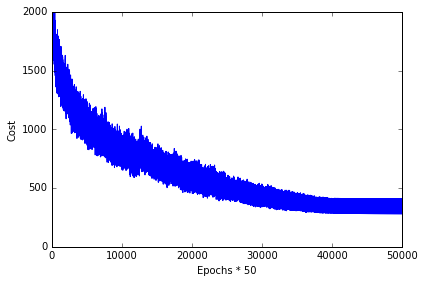

In [40]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
plt.show()

보다시피, cost function은 매우 noisy해 보인다. mini-batch learning을 이용한 신경망이기 때문이다. (Stochastic gradient descent)

이미 800 epoch에서 최적화가 끝난 것을 볼 수 있지만, 더 smoother한 cost function을 살펴보자. 코드는 다음과 같다.

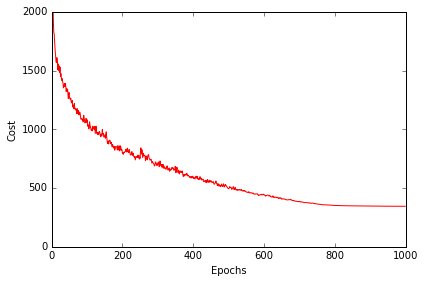

In [41]:
batches = np.array_split(range(len(nn.cost_)),1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

이제, 예측의 ACCURACY를 구해보자.

In [42]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 97.89%


보다시피, training data set에 대해서 높은 정확도를 보인다. 하지만 학습되지 않은 데이터에 대해선 어떨까? 1만개의 test dataset에 대해 확인해보자.

In [43]:
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 96.07%


트레이닝 셋과 테스트 셋의 정확도에서 살짝 차이가 나는것으로 보아, 모델이 트레이닝 셋에 살짝 overfit됐다고 볼 수 있다. 모델의 성능을 더 올리기 위해,
1. hidden units의 수를 바꾸거나,
2. 정규화(regularization) 파라미터의 값을 바꾸거나,
3. 학습률(에타)를 바꾸거나,
4. Chp6에서 배운 adaptive learning technique을 이용해봐라.

이제, 어떤 이미지를 MLP 모델이 인식하지 못한 것인지 보자.

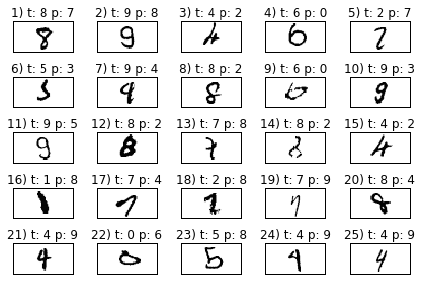

In [44]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Training an artificial neural network

신경망이 실제 어떻게 사용되는지에 대해 코드를 통해 기본적인 이해를 하였다. 이제 살짝 더 깊이 들어가보자. 우리가 weight를 구하기 위해 사용했던 logistic cost function과 backpropagation 알고리듬과 같은 개념을 살펴본다.

## Computing the logistic cost function

이 로지스틱 비용 함수는 실제로 매우 간단하게 다음과 같이 정의 된다.

![Image](Pictures/chp12/new24.PNG)

여기서 a^(i)는 어떤 레이어에서의 i번째 unit의 sigmoid activation이다.

![Image](Pictures/chp12/new25.PNG)

이제, 정규화 식을 추가해보자. 정규화를 통해 overfitting을 줄일 수 있다. 지난 챕터에서, L2와 L1을 정규화하는 것에 대해 다음과 같이 배웠다.

![Image](Pictures/chp12/new26.PNG)

비록 MLP가 L1과 L2의 정규화를 모두 수행할지라도, 우리는 간단히 L2에만 초점을 맞추겠다. 같은 개념을 L1 정규화 할 때 이용할 수 있다. L2 정규화식에 logistic cost function을 더하면 다음을 얻을 수 있다.

![Image](Pictures/chp12/new27.PNG)

Multi-class classfication을 하기 위해 MLP를 수행하면, 이것은 _t_ 요소의 output vector를 되돌려준다. 우리는 이것을 one-hot encoding representation에서의 _t_ x 1 차원의 target vector와 비교해볼 필요가 있다. 예를 들어, 세 번째 레이어의 엑티베이션과 특정 샘플의 target class는 다음과 같다.

![Image](Pictures/chp12/new28.PNG)

그러므로, 우리는 logistic cost function을 네트워크의 모든 엑티베이션 유닛 _j_로 정규화해야한다. 따라서 cost function은 다음과 같이 변한다.(정규화 과정 없이)

![Image](Pictures/chp12/new29.PNG)

여기, superscript _i_는 트레이닝 셋에서의 특정 샘플의 인댁스이다.

다음 일반적인 정규화 term은 처음에는 다소 복잡해 보인다. 하지만, 이것은 _l_ 레이어의 모든 weight의 합을 계산하는 것일 뿐이며 첫 열에 추가되는 것이다.

![Image](Pictures/chp12/new30.PNG)

다음 식은 L2-penalty term을 표현한다.

![Image](Pictures/chp12/new31.PNG)

우리의 목적은 cost function _J(w)_를 최소화 하는 것이다. 그러므로, 우리는 네트워크의 모든 레이어의 각각의 weight에 대해 행렬 _W_의 편미분을 계산해야 한다.

![Image](Pictures/chp12/new32.PNG)

이 다음 섹션에서는, backpropagation 알고리듬에 대해 얘기해본다. 이것은 cost function을 최소화하기위한 편미분을 계산할 수 있게 해준다.

_**W**_는 다수의 행렬들로 구성되어 있다. 1개 히든 유닛을 갖는 멀티레이어 퍼셉트론에서는 weight 행렬 _**W**_^(1)을 가지며 이것은 히든레이어와 아웃풋레이어를 연결해준다. 행렬 _**W**_를 직관적으로 시각화시키면 다음과 같다.

![Image](Pictures/chp12/new33.PNG)

이 단순화된 그림에서, _**W**_^(1)와 _**W**_^(2)는 같은 개수의 행과 열을 갖는 것처럼 보인다. 이것은 같은 개수의 히든 유닛과 아웃풋 유닛과 인풋 유닛을 갖는 MLP를 설정하지 않는 한, 일반적인 case가 아니다.

만약 헷갈린다면, 다음 섹션에 주목해라. backpropagation 알고리듬을 맥락으로 _**W**_^(1)과 _**W**_^(2)의 차원 수에 대해 더 자세히 다룰 것이다.

## Training neural networks via backpropagation

이번 절에서는, 신경망이 어떻게 매우 효율적으로 weight를 학습해나가는지에 대해 이해하기 위해 backpropagation에 대한 수학을 공부할 것이다. 당신이 수학적 표현을 얼마나 편해하는지에 따라 다음 수식들은 처음에는 적당히 복잡해보일 것이다. 많은 사람들은 botoom-up 접근방식을 사용하며, 수식을 단계별로 살피며 알고리듬에 대한 직관을 얻기를 좋아한다. 하지만, 당신이 top-down 방식을 선호하며 모든 수학적 식 없이 backpropagation에 대해 이해하기를 원한다면, 다음 절인 _Developing your intuition for backpropagation_ 을 먼저 보고, 다시 이 섹션을 공부해라.

이전 절에서는, target class label과 마지막 레이어의 엑티베이션 사이의 차이인 cost를 어떻게 계산하는지에 대해 배웠다. 이제는, backpropagation 알고리듬이 MLP 모델에서 어떻게 weight를 업데이트 하는지에 대해 볼 것이며, 이것은  get_gradient 함수를 이용한다. 이 챕터의 시작부분을 다시 보고, output 레이어의 엑티베이션을 얻기 위해 forward propagation을 했던 것을 먼저 적용해본다. 식은 다음과 같다.

![Image](Pictures/chp12/34.PNG)

간단히, 우리는 연결을 통해 네트워크 속에서 input feature를 forward 방향으로 전파해나간다.

![Image](Pictures/chp12/35.png)

Backpropagation에선, 우리는 error를 오른쪽에서 왼쪽으로 전파해나간다. 우리는 아웃풋 레이어로부터 에러벡터를 계산하기 시작한다.

![Image](Pictures/chp12/36.PNG)

여기서 _y_는 true class 레이블의 벡터이다.

다음으로, 우리는 히든 레이어의 에러 term을 계산한다.

![Image](Pictures/chp12/37.PNG)

여기서 ∂∮(z^(2)) / ∂z^(2) 는 단순히 sigmoid activation function의 미분이며, 이것을 sigmoid_gradient로 정의한다.

![Image](Pictures/chp12/38.PNG)

별표 기호는 문맥상 element-wsie multiplication(내적)을 의미한다.

![Image](Pictures/chp12/39.PNG)

δ^(2)을 계산하는 과정을 더 잘 이해하기 위해, 더 깊이 들여다보자. 앞선 식에서, t x h 크기의 _**W**_^(2) 행렬의 전치행렬인 (_**W**_^(2))^_T_를 계산하였다. _t_는 아웃풋 클래스 레이블의 개수를 의미하며, _h_는 히든 유닛의 개수를 의미한다. 이제 전치행렬은 h x t 차원의 행렬이 된다. _t_ x _l_ 차원의 벡터 δ^(2)도 있다. 이제 우리는 전치행렬과 a^(2) * (1-a^(2))를 pair-wise multiplication 하게 되며, 이것은 _t_ x _l_ 차원의 벡터다. 결국, δ term을 얻은 후에 cost function의 미분을 다음과 같이 쓸 수 있다.

![Image](Pictures/chp12/new40.PNG)

다음으로, 모든 _l_ 레이어의 _j_번째 노드의 편미분과 _l+1_ 레이어의 _i_번째 error를 계산해야 한다.

![Image](Pictures/chp12/40.PNG)

트레이닝 셋의 모든 샘플에 대해 Δ_i,j^(l)_ 를 계산해야 한다. 따라서 벡터라이즈된 버전을 통해 계산하는 것이 쉽다.

![Image](Pictures/chp12/41.PNG)

편미분을 구해낸 후에, 다음과 같은 정규화 항을 더할 수 있다.

![Image](Pictures/chp12/42.PNG)

Gradients를 계산한 후, 마침내 gradient의 역방향으로 weight를 업데이트 할 수 있다.

![Image](Pictures/chp12/43.PNG)

모든 과정을 통합하기 위해, backpropagation을 요약해보면 다음과 같다.

![Image](Pictures/chp12/44.png)

-----------------------------------------------------------------------------------

## Developing your intuition for backpropagation

비록 backpropagation이 거의 30년 전에 재발견되고 인기를 얻었지만, 여전히 인공신경망을 매우 효율적으로 학습시키기 위한 알고리듬으로 사용되고 있다. 이번 절에서는, 더욱 직관적인 요약을 보고, 이 매혹적인 알고리듬 작동의 큰 그림을 살펴보자.

본질적으로, backpropagation은 단지 복잡한 비용 함수의 미분을 구하기 위한 매우 계산적으로 효율적인 접근 방법이다. 우리의 목적은 이러한 도함수를 이용하여 멀티 레이어 인공신경망을 파라미터화 하기 위한 weight coefficient를 학습시키는 것이다. 신경망을 파라미터하는데 가장 큰 문제는 고차원 feature에서의 많은 weight coefficients를 다루는 것이다. 이전 챕터에서 봤던 비용함수와는 다르게, 신경망 비용 함수의 오차 면은 convex 하거나 smooth하지 않다. 고차원 비용 면에는 많은 bumps가 있기(local minima) 때문에 Global minimum으로 도달하기 위한 방법이 필요하다.

미적분학 수업의 개론에서 배운 chain rule을 떠올려보자. chain rule은 복잡하거나, 합성함수 등을 basic components로 쪼개준다.

![Image](Pictures/chp12/45.PNG)

Computer algebra의 맥락에서, 이러한 technique은 문제를 매우 효율적으로 해결할 수 있도록 해주며, _automatic differentiation_이라고도 알려져 있다. 머신 러닝의 automatic differentiation에 흥미가 있다면, 다음을 추천한다.

A. G. Baydin and B. A. Pearlmutter. Automatic Differentiation of Algorithms for Machine Learning. arXiv preprint arXiv:1404.7456, 2014, which is freely available on arXiv at http://arxiv.org/pdf/1404.7456.pdf.

Automatic differentiation은 _forward_ mode와 _reverse_ mode가 있다. Backpropagation은 단순히 reverse-mode automatic differentiation의 special case이다. forward mode에서 chain rule을 적용하는 것은 매우 expensive하다. 왜냐면 각각의 레이어마다 많은 행렬을 곱셈해야 하기 때문이며, 우리는 결국 벡터의 곱으로 output을 얻게 된다. reverse mode의 trick은 오른쪽부터 왼쪽으로 진행해나가는 것이다. 행렬에 벡터를 곱하고, 그 과정을 반복하는 것이기 때문이다. 행렬-벡터의 곱은 행렬-행렬의 곱보다 훨씬 계산이 간단하다. 이것이 신경망의 학습에서 backpropagation이 가장 인기있는 것 중 하나인 이유다.

## Debugging neural networks with gradient checking

인공신경망의 실행은 다소 복잡하며, backpropagation이 올바르게 수행되는지 손수 체크해주는 것이 중요하다. 이번 절에서는, gradient checking 이라는 단순한 과정에 대해 보겠다. Gradient checking이란 신경망에서의 analytical gradient와 numerical한 gradient를 비교하는 것이다. Gradient checking은 단순히 feedforward 신경망에서 뿐만 아니라 Gradient 최적화 기반의 다른 어떤 신경망 구조에도 사용될 수 있다. Gradient 기반 최적화를 하는 더 하찮은 알고리듬인 Linear regression, logistic regression, SVM등을 이용하더라도, check하는 것은 고려해볼만 하다.

이전 절에서, cost function을 _J(W)_로 정의했다. _W_는 인공 신경망의 weight coefficients 행렬이다. _J(W)_는 간단히 말하여, 하나의 hidden unit을 가진 멀티레이어 퍼셉트론의 _W_^(1)와 _W_^(2) 행렬들을 포함하는 "stacked 쌓인" 행렬이라 볼 수 있다. _W_^(1)을 input layer와 hidden layer를 연결하는 h x [m+1] 차원의 행렬로 정의할 수 있으며, _W_^(2)를 hidden layer와 output layer를 연결하는 t x h 행렬로 정의할 수 있다. (_t_는 output units) 결국 weight w_i,j^(_l_)를 위한 비용함수의 미분을 계산할 수 있게 된다.

![Image](Pictures/chp12/46.PNG)

Gradient의 반대 방향으로 weight를 업데이트 함을 기억해라. Gradient checking에서, analytical solution과 numerically approximated gradient를 비교한다.

![Image](Pictures/chp12/47.PNG)

여기서 입실론은 일반적으로 1e-5와 같은 매우 작은 수이며, 직관적으로 전진 차분 근사법(__finite difference approximation__)를 w와 w+ε의 점을 연결하는 시컨트 직선의 기울기로 생각할 수 있다. 간단하게 보기위해 superscripts를 무시하고  subscript만 보겠다.

![Image](Pictures/chp12/48.png)

더 정확한 경사를 근사하기 위한 방법은 두 점으로 부터 구해지는 symmetric하거나 centered한 계차몫을 구하는 것이다. (계차몫 : Δx만큼 증가할 때, Δy(x)와 Δx의 비)

![Image](Pictures/chp12/49.PNG)

일반적으로, numerical gradient _J'_n 과 analytical gradient _J'_a 의 근사한 차이는 L2 vector norm으로써 계산된다. 편리성을 위해 계산된 gradient 행렬을 flat 벡터로 나눈 후, error를 계산하게 된다.

![Image](Pictures/chp12/50.PNG)

에러가 규모가 변하지 않는 경우가 문제다. 그러므로 다음과 같은 상대오차를 계산하는 것을 추천한다.

![Image](Pictures/chp12/51.PNG)

이제 numerical gradient와 analytical gradient의 상대 오차를 가능한 작게 만들길 원한다. gradient checking을 수행하기 전에, 하나 더 자세히 볼 것이 있다. Error threshold를 얼마로 정해서 어느정도의 오차까지 허용할 것인가? Error threshold 값은 상대오차는 네트워크 구조의 복잡성에 따라 다르다. 일반적으로, 히든레이어를 추가할수록 numerical과 analytical 사이의 차이는 점점 더 커진다.(backpropagation이 올바르게 작동한다는 전제하에) 따라서 우리는 상당히 간단한 신경망 구조를 수행했었으므로, 다음과 같이 다소 엄격한 threshold를 정의한다.

    • Relative error <= 1e-7 means everything is okay!

    • Relative error <= 1e-4 means the condition is problematic, and we should look into it.

    • Relative error > 1e-4 means there is probably something wrong in our code.

이제 이러한 rule을 세우고 gradient checking을 해보자. 다음과 같은 함수를 NeuralNetMLP class에 추가해준다.

In [45]:
def _gradient_checking(self, X, y_enc, w1, w2, epsilon, grad1, grad2):
    """ Apply gradient checking (for debugging only)
    
    Returns
    ---------
    relative_error : float
      Relative error between the numerically
      approximated gradients and the backpropagated gradients.
    
    """
    num_grad1 = np.zeros(np.shape(w1))
    epsilon_ary1 = np.zeros(np.shape(w1))
    for i in range(w1.shape[0]):
        for j in range(w1.shape[1]):
            epsilon_ary1[i, j] = epsilon
            a1, z2, a2, z3, a3 = self._feedforward(X, w1 - epsilon_ary1, w2)
            cost1 = self._get_cost(y_enc, a3, w1-epsilon_ary1, w2)
            a1, z2, a2, z3, a3 = self._feedforward(X, w1 + epsilon_ary1, w2)
            cost2 = self._get_cost(y_enc, a3, w1 + epsilon_ary1, w2)
            num_grad1[i, j] = (cost2 - cost1) / (2 * epsilon)
            epsilon_ary1[i, j] = 0
            
    num_grad2 = np.zeros(np.shape(w2))
    epsilon_ary2 = np.zeros(np.shape(w2))
    for i in range(w2.shape[0]):
        for j in range(w2.shape[1]):
            epsilon_ary2[i, j] = epsilon
            a1, z2, a2, z3, a3 = self._feedforward(X, w1, w2 - epsilon_ary2)
            cost1 = self._get_cost(y_enc, a3, w1, w2 - epsilon_ary2)
            a1, z2, a2, z3, a3 = self._feedforward(X, w1, w2 + epsilon_ary2)
            cost2 = self._get_cost(y_enc, a3, w1, w2 + epsilon_ary2)
            num_grad2[i, j] = (cost2 - cost1) / (2 * epsilon)
            epsilon_ary2[i, j] = 0
    
    num_grad = np.hstack((num_grad1.flatten(), num_grad2.flatten()))
    grad = np.hstack((grad1.flatten(), grad2.flatten()))
    norm1 = np.linalg.norm(num_grad - grad)
    norm2 = np.linalg.norm(num_grad)
    norm3 = np.linalg.norm(grad)
    relative_error = norm1 / (norm2 + norm3)
    return relative_error

위 코드는 다소 간단하다. 하지만 이처럼 최소한 간단히 유지하는 것을 추천한다. 우리의 목적은 gradient computation이 double-check되도록 하는 것이며 gradient checking에서 추가적인 실수가 안 생기도록 하는 것이다. 그리고, __fit__함수를 간단히 수정해볼 것이다. 다음 코드에서는 명확하게 하기 위해, __fit__의 시작부분을 지웠고, start gradient checking과 end gradient checking을 살펴본다.

In [ ]:
class MLPGradientCheck(object):
    [...]
    def fit(self, X, y, print_progress=False):
        [...]
                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2, a3=a3, z2=z2,
                                                  y_enc=y_enc[:, idx], w1=self.w1, w2=self.w2)
                ## start gradient checking
                grad_diff = self._gradient_checking(X=X[idx], y_enc=y_enc[:, idx], w1=self.w1,
                                                    w2=self.w2, epsilon=1e-5, grad1=grad1, grad2=grad2)
                if grad_diff <= 1e-7:
                    print('Ok: %s' % grad_diff)
                elif grad_diff <= 1e-4:
                    print('Warning: %s' % grad_diff)
                else:
                    print('PROBLEM: %s' % grad_diff)

                ## end gradient checking

                # update weights; [alpha * delta_w_prev]
                # for momentum learning
                delta_w1 = self.eta * grad1
                delta_w2 = self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev = delta_w1
                delta_w2_prev = delta_w2
        return self

수정된 멀티레이어 퍼셉트론 클래스의 이름을 MLPGradientCheck라고 정의하고, 10개의 hidden layer를 가진 새로운 MLP 객체를 만든다. 또한 정규화와 adaptive learning과 momentum learning을 망가뜨린다. 추가적으로, minibatches를 1로 셋팅 함으로써 regular gradient descent를 수행한다. 코드는 다음과 같다.

In [ ]:
nn_check = MLPGradientCheck(n_output=10, n_features=X_train.shape[1], n_hidden=10,
                            l2=0.0, l1=0.0, epochs=10, eta=0.001, alpha=0.0,
                            decrease_const=0.0, minibatches=1, random_state=1)

One downside of gradient checking은 매우 very expensive하다. gradient checking을 통해 신경망을 training 하는 것은 매우 느리므로 디버깅 목적으로만 사용하길 바란다. 이러한 이유 때문에, 적은 수의 샘플에 대해서만 checking을 사용한다.

In [ ]:
nn_check.fit(X_train[:5], y_train[:5], print_progress=False)

좋은 결과를 보여준다.

## Convergence in neural networks

왜 gradient descent를 위해 regular한 방법을 사용하지 않고, mini-batch learning을 했는지 궁금해 할지도 모른다. stochastic gradient descent는 online learning에 보통 쓰인다. Online learning에서는 weight 업데이트를 위해 한 번에 하나의 싱글 트레이닝 example만 다룬다. 비록 stochastic한 접근법이지만, 이것은 매우 정확한 결과를 주기도 하며, regular 방법보다 훨씬 빠르다. mini-batch의 경우 stochastic gradient descent 방법의 특수한 케이스이며, n개의 training sample 중에서 k개의 sample을 골라 사용한다. 이는 계산을 매우 효율적으로 해준다. 하지만 아주 빠른 update가 가능하다.

![Image](Pictures/chp12/52.png)

## Other neural network architectures

## Convolutional Neural Networks

![Image](Pictures/chp12/53.png)

![Image](Pictures/chp12/54.png)

![Image](Pictures/chp12/55.png)

122

## A few last words about neural network implementation

## Summary